[3115] 3115
Length: 401
Type of XContents[0] :  <class 'numpy.ndarray'>
<class 'int'> 1905


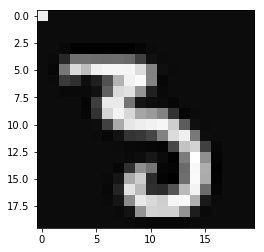

Classified Class :  3
Actual Class     :  3
<class 'int'> 4585


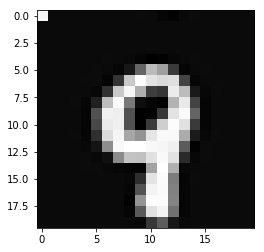

Classified Class :  9
Actual Class     :  9
<class 'int'> 1272


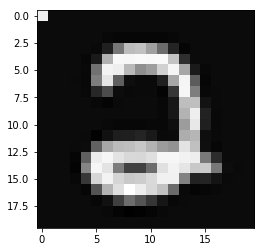

Classified Class :  2
Actual Class     :  2
<class 'int'> 817


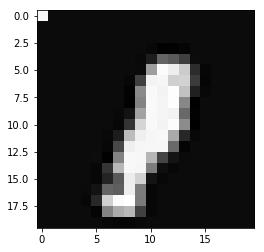

Classified Class :  1
Actual Class     :  1
<class 'int'> 318


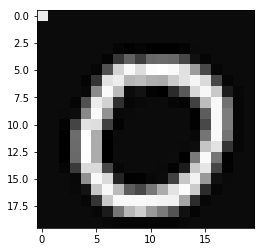

Classified Class :  0
Actual Class     :  0
<class 'int'> 502


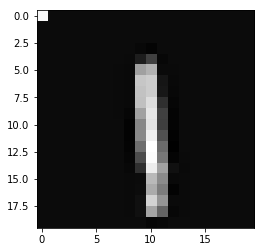

Classified Class :  1
Actual Class     :  1
<class 'int'> 571


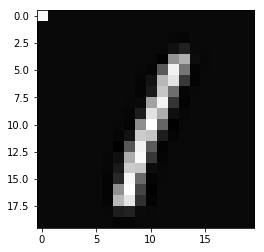

Classified Class :  1
Actual Class     :  1
<class 'int'> 378


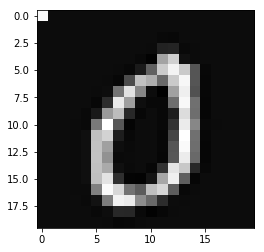

Classified Class :  0
Actual Class     :  0
<class 'int'> 3791


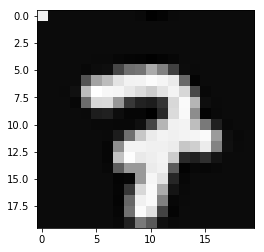

Classified Class :  7
Actual Class     :  7
<class 'int'> 3715


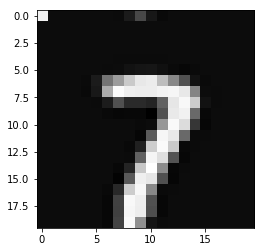

Classified Class :  7
Actual Class     :  7
Accuracy :  100.0 %


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import scipy.io as sio
#from PIL import Image
import random

L = 0
R = 5000
randomIndex = random.sample(range(L,R),1)
print(randomIndex,randomIndex[0])

from numpy import genfromtxt
my_data = genfromtxt('test.txt', delimiter=',')
print("Length:" , len (my_data[0]) )

mat_contents = sio.loadmat('ex3data1.mat')
XContents = mat_contents['X']
YContents = mat_contents['y']
# Appending 1 at each row of X:
print("Type of XContents[0] : ",type(XContents[0]))
X = np.zeros(shape = ( len(XContents) , len(XContents[0])+1 ))

y = []
i=0
for i in range(0,len(XContents)):
    y.append(YContents[i][0])

i=0
for i in range(0,len(XContents)):
    X[i][0] = 1.0
    j = 0
    for j in range(0,len(XContents[0])-1):
        X[i][j+1] = XContents[i][j]
        j = j + 1
    i = i + 1

def displayGivenDataSet(X,index):
    image = np.zeros((20,20))
    k=0
    print(type(index),index)
    row = int(index)
    
    for i in range(0,20):
        for j in range(0,20):
            image[j][i] = X[row][k]
            k = k+1
            j = j+1
        i = i+1
    plt.imshow(image,cmap = 'gray')
    plt.show()
    


#Actual testing: 

#Testing for [L,R]:

def testAndFindAccuracy():
    L = 0
    R = 5000
    i=0
    Total = (R-L)
    correctCount=0
    for index in range(L,R):
        testX = X[index]
        #displayGivenDataSet(X,index)
        maxValue = -9999999999
        answerClass = -1
        i=0
        for i in range(1,11):
            #print("I : ",i)
            sum=0
            j=0
            for j in range(0,len(my_data[i-1])-1):
                sum = sum + (testX[j]*my_data[i-1][j])
                j = j + 1
        
            if(sum > maxValue):
                maxValue = sum
                answerClass = i
                if(answerClass == 10):
                    answerClass=0
        
            i = i+1
        
        #print("Classified Class : ",answerClass)
        actualClass = y[index]
        if(actualClass == 10):
            actualClass = 0
        #print("Actual Class     : ",actualClass)
        if(answerClass == actualClass):
            correctCount = correctCount + 1
            
        index = index + 1 
        
    print("Accuracy : ",(correctCount/Total)*100,"%")

    
def testRandomAndFindAccuracy():
    L = 0
    R = 4999
    numberOfSamples = 10
    indicesList = random.sample(range(L,R),numberOfSamples)
    Total = numberOfSamples
    correctCount=0
    for index in range(0,len(indicesList)):
        testX = X[indicesList[index]]
        displayGivenDataSet(X,indicesList[index])
        maxValue = -9999999999
        answerClass = -1
        i=0
        for i in range(1,11):
            #print("I : ",i)
            sum=0
            j=0
            for j in range(0,len(my_data[i-1])-1):
                sum = sum + (testX[j]*my_data[i-1][j])
                j = j + 1
        
            if(sum > maxValue):
                maxValue = sum
                answerClass = i
                if(answerClass == 10):
                    answerClass=0
        
            i = i+1
        
        print("Classified Class : ",answerClass)
        actualClass = y[indicesList[index]]
        if(actualClass == 10):
            actualClass = 0
        print("Actual Class     : ",actualClass)
        if(answerClass == actualClass):
            correctCount = correctCount + 1
            
        index = index + 1 
        
    print("Accuracy : ",(correctCount/Total)*100,"%")

    
    
    
#testAndFindAccuracy()

testRandomAndFindAccuracy()